In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib notebook

In [2]:
E = np.zeros(200)
I = np.zeros(200)
R = np.zeros(200)
D = np.zeros(200)
S = np.zeros(200)
II = np.zeros(200);              
a_I = 15  
B_I = 0.313 
a_E = 20    
B_E = 0.313  
i_R = 0.9436  
i_D = 0.0579
e_I= 1/7    
e_R = 0.1   
n = 2/3     
n_d = 1   
#td = np.arange(200);
Time = np.zeros(200)
Time1 = np.zeros(200)
Time2 = np.zeros(200)
T = np.arange(200)
Data_D = np.zeros([200,200])
Data_S = np.zeros([200,200])
Data_I = np.zeros([200,200])
Td = 5

for td_indx in range(200):
    max_time = 0
    max_number = 0
    min_time = 0
    min_number = 11210000
    equal_time = 0
    equal_number = 0
    T = np.arange(200)
    E[0] = 650
    I[0] = 433
    R[0] = 123
    D[0] = 17
    S[0] = 11210000
    II[0] = 433
    n_d = 1
    for idx in range(199):
        if (idx>=Td):
            n_d = (td_indx+1) * 0.005
        S[idx+1] = S[idx] - a_I*B_I*n*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) - a_E*B_E*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) + i_R*I[idx] + e_R*E[idx]
        E[idx+1] = E[idx] + a_I*B_I*n*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) + a_E*B_E*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) - e_I*E[idx] - e_R*E[idx]
        I[idx+1] = I[idx] + e_I*E[idx] - i_R*I[idx]- i_D*I[idx]
        R[idx+1] = R[idx] + i_R*I[idx] + e_R*E[idx]
        D[idx+1]= D[idx] + i_D*I[idx]
        II[idx+1] = II[idx]+ I[idx+1]
        for i in range(200):
            if I[i]>max_number :
                max_number = I[i]
                max_time = i
        for i in range(200):
            if S[i]<min_number :
                min_number = S[i]
                min_time = i
        for i in range(200):
            if math.floor(D[i])>equal_number :
                equal_number = math.floor(D[i])
                equal_time = i
    Time[td_indx] = max_time
    Time1[td_indx] = min_time
    Time2[td_indx] = equal_time
    Data_D[td_indx] = D
    Data_I[td_indx] = I
    Data_S[td_indx] = S
# print(Time1)
# print(Time)
# print(Time2)

<IPython.core.display.Javascript object>


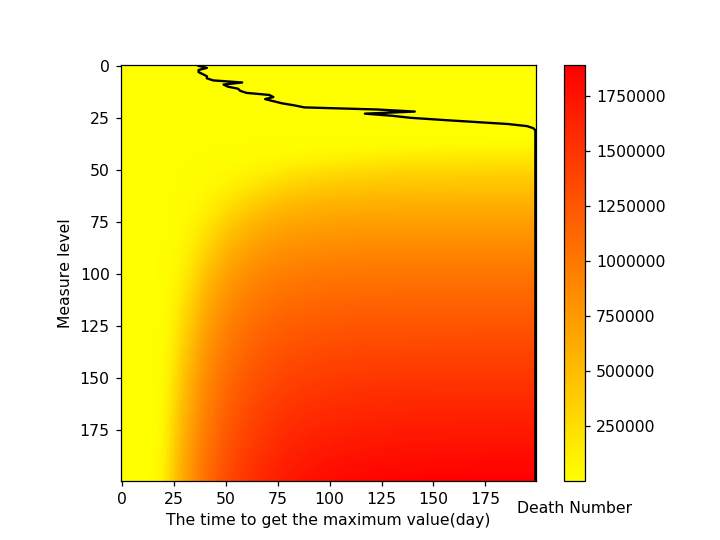

In [3]:
fig1 = plt.figure()
plt.imshow(Data_D,cmap=plt.cm.autumn_r,interpolation='nearest')#, 
plt.colorbar()
plt.plot(Time2,T,'k')
#plt.legend("累计死亡人数")
plt.ylabel("Measure level")
plt.xlabel('The time to get the maximum value(day)')
plt.text(190,215,'Death Number')
plt.show()
fig1.savefig('./Nd_D_hotmap.svg', dpi = 400, bbox_inches = 'tight')

<IPython.core.display.Javascript object>


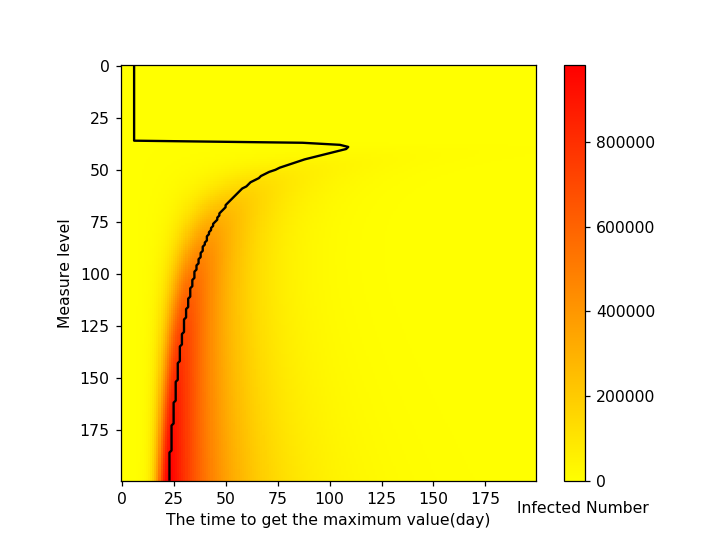

In [4]:
fig2 = plt.figure()
plt.imshow((Data_I),cmap=plt.cm.autumn_r,interpolation='nearest')#, viridis 
plt.colorbar()
plt.plot(Time,T,'k')
plt.ylabel("Measure level")
plt.xlabel('The time to get the maximum value(day)')
plt.text(190,215,'Infected Number')
plt.show()
fig2.savefig('./Nd_I_hotmap.svg', dpi = 400, bbox_inches = 'tight')

<IPython.core.display.Javascript object>


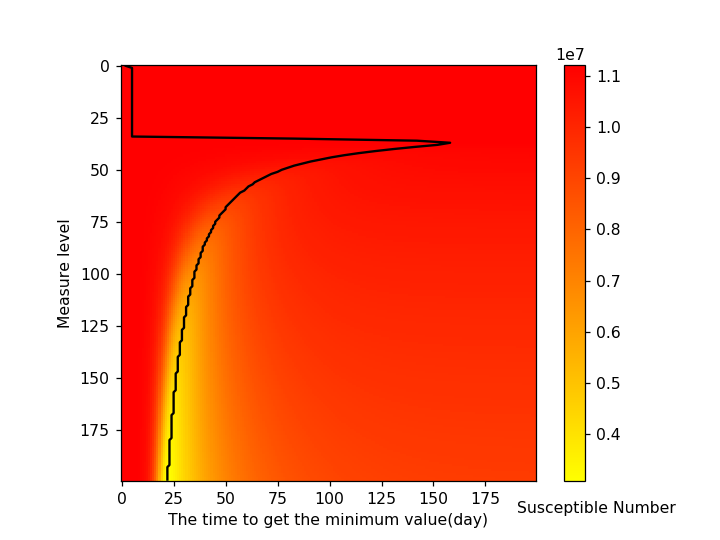

[  2.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.
   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.
   5.   5.   5.   5.   5.   5.   5.  83. 142. 158. 152. 141. 131. 122.
 114. 107. 101.  96.  91.  87.  83.  80.  77.  75.  72.  70.  68.  66.
  64.  63.  61.  60.  59.  57.  56.  55.  54.  53.  52.  51.  50.  50.
  49.  48.  47.  47.  46.  45.  45.  44.  44.  43.  43.  42.  42.  41.
  41.  40.  40.  39.  39.  39.  38.  38.  38.  37.  37.  37.  36.  36.
  36.  35.  35.  35.  35.  34.  34.  34.  34.  33.  33.  33.  33.  32.
  32.  32.  32.  32.  31.  31.  31.  31.  31.  30.  30.  30.  30.  30.
  30.  29.  29.  29.  29.  29.  29.  28.  28.  28.  28.  28.  28.  28.
  27.  27.  27.  27.  27.  27.  27.  27.  26.  26.  26.  26.  26.  26.
  26.  26.  26.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  23.  23.
  23.  23.  23.  23.  23.  23.  23.  23.  23.  23.  23.  22.  22.  22.
  22. 

In [5]:
fig3 = plt.figure()
plt.imshow(Data_S ,cmap=plt.cm.autumn_r)#, summer
plt.colorbar()
plt.plot(Time1,T,'k')
print(Time1)
plt.ylabel("Measure level")
plt.xlabel('The time to get the minimum value(day)')
plt.text(190,215,'Susceptible Number')
plt.show()
fig3.savefig('./Nd_S_hotmap.svg', dpi = 400, bbox_inches = 'tight')